<a href="https://colab.research.google.com/github/joshuabusinge/BananaVsCasava/blob/main/CropDetectionV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from skimage.io import imshow, imread
 from skimage.color import rgb2gray
 from skimage.filters import threshold_mean
 from skimage.morphology import closing
 from skimage.measure import label, regionprops, regionprops_table
 from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import classification_report
 from matplotlib import pyplot as plt
 import pandas as pd
 import numpy as np
 from tqdm import tqdm 
 import os

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


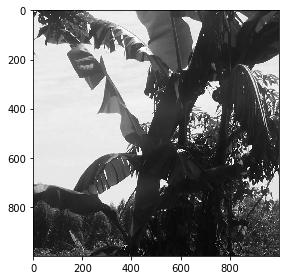

In [3]:
 # get the filenames of the leaves under the directory “Leaves”
 path = "/content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/ComputerVision/Crop Detection/Set1/CroppedImages/Banana/"
 image_path_list = os.listdir(path)
 # looking at the first image
 i = 0
 image_path = image_path_list[i]
 image = rgb2gray(imread(path+image_path))
 imshow((image))

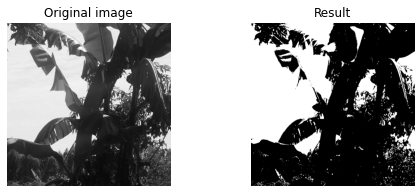

In [4]:
thresh = threshold_mean(image)
binary = image > thresh
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')
plt.show()


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


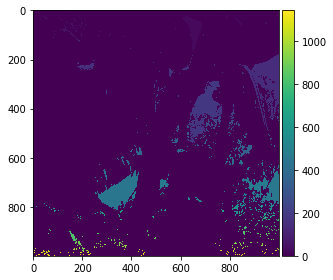

In [5]:
label_img = label(binary)
imshow(label_img)

In [6]:
table = pd.DataFrame(regionprops_table(label_img, image,
                                       ['convex_area', 'area',
                                        'eccentricity', 'extent',                   
                                        'inertia_tensor','perimeter',
                                        'major_axis_length', 
                                        'minor_axis_length']))
table['convex_ratio'] = table['area']/table['convex_area']
table['label'] = image_path[2]
table

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,perimeter,major_axis_length,minor_axis_length,convex_ratio,label
0,338719,252737,0.768553,0.648044,20334.652603,8961.869962,8961.869962,35152.241083,8752.161323,793.687396,507.789933,0.746155,n
1,27,26,0.937194,0.481481,4.309172,-2.470414,-2.470414,2.437870,20.142136,9.810349,3.421945,0.962963,n
2,5,5,0.816497,0.833333,0.560000,0.120000,0.120000,0.240000,5.207107,3.098387,1.788854,1.000000,n
3,56,43,0.859145,0.511905,9.095727,2.505679,2.505679,3.608437,31.071068,12.691873,6.494844,0.767857,n
4,346,199,0.989161,0.442222,201.395419,5.618116,5.618116,4.505997,103.041631,56.788111,8.338650,0.575145,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,3,3,0.816497,0.750000,0.222222,-0.111111,-0.111111,0.222222,3.414214,2.309401,1.333333,1.000000,n
1138,2,2,1.000000,1.000000,0.250000,-0.000000,-0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,n
1139,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,n
1140,2,2,1.000000,1.000000,0.250000,-0.000000,-0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,n


In [7]:
image_path_list = os.listdir(path)
df = pd.DataFrame()
for i in range(len(image_path_list)):
   
  image_path = image_path_list[i]
  image = rgb2gray(imread(path+image_path))
  thresh = threshold_mean(image)
  binary = image > thresh
  binary = closing(binary)
  label_img = label(binary)
  
  table = pd.DataFrame(regionprops_table(label_img, image,
                          ['convex_area', 'area', 'eccentricity',
                           'extent', 'inertia_tensor',                         
                           'major_axis_length', 'minor_axis_length',
                           'perimeter', 'solidity', 'image',
                           'orientation', 'moments_central',
                           'moments_hu', 'euler_number',
                           'equivalent_diameter',
                           'mean_intensity', 'bbox']))
  table['perimeter_area_ratio'] = table['perimeter']/table['area']
  real_images = []
  std = []
  mean = []
  percent25 = []
  percent75 = []
  for prop in regionprops(label_img): 
      
      min_row, min_col, max_row, max_col = prop.bbox
      img = image[min_row:max_row,min_col:max_col]
      real_images += [img]
      mean += [np.mean(img)]
      std += [np.std(img)]
      percent25 += [np.percentile(img, 25)] 
      percent75 += [np.percentile(img, 75)]
  table['real_images'] = real_images
  table['mean_intensity'] = mean
  table['std_intensity'] = std
  table['25th Percentile'] = mean
  table['75th Percentile'] = std
  table['iqr'] = table['75th Percentile'] - table['25th Percentile']
  table['label'] = image_path[5]
  df = pd.concat([df, table], axis=0)
df.head()

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,...,bbox-1,bbox-2,bbox-3,perimeter_area_ratio,real_images,std_intensity,25th Percentile,75th Percentile,iqr,label
0,340237,254572,0.766820,0.652749,20383.581919,8895.971219,8895.971219,35173.318477,793.439223,509.278514,...,0,750,520,0.029427,"[[0.21573098039215688, 0.1560741176470588, 0.1...",0.304951,0.661566,0.304951,-0.356615,a
1,27,26,0.937194,0.481481,4.309172,-2.470414,-2.470414,2.437870,9.810349,3.421945,...,35,6,44,0.774698,"[[0.6042945098039216, 0.6317454901960784, 0.87...",0.243022,0.416543,0.243022,-0.173521,a
2,5,5,0.816497,0.833333,0.560000,0.120000,0.120000,0.240000,3.098387,1.788854,...,122,2,125,1.041421,"[[0.4727180392156863, 0.5589925490196078, 0.45...",0.084121,0.436770,0.084121,-0.352649,a
3,56,45,0.852987,0.535714,8.723951,2.458765,2.458765,3.642469,12.470041,6.508517,...,167,7,179,0.659041,"[[0.7561494117647058, 0.4306592156862745, 0.43...",0.234178,0.494944,0.234178,-0.260766,a
4,349,201,0.989231,0.446667,202.579540,6.017995,6.017995,4.526373,56.957842,8.336599,...,658,10,703,0.512645,"[[0.42138039215686274, 0.5614180392156862, 0.6...",0.229441,0.457784,0.229441,-0.228343,a


In [8]:
X = df.drop(columns=['label', 'image', 'real_images'])
#features
X = X[['iqr','75th Percentile','inertia_tensor-1-1',
       'std_intensity','mean_intensity','25th Percentile',
       'minor_axis_length', 'solidity', 'eccentricity']]
#target
y = df['label']
columns = X.columns
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=123, stratify=y)

#### Classifier Algorithm

In [9]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 100.0


In [10]:
print(f"Test Accuracy: {np.mean(gnb.predict(X_test) ==y_test)*100:.2f}%")

Test Accuracy: 100.00%


In [11]:
#print confusion matrix of test set
print(classification_report(gnb.predict(X_test), y_test))

              precision    recall  f1-score   support

           a       1.00      1.00      1.00     22861

    accuracy                           1.00     22861
   macro avg       1.00      1.00      1.00     22861
weighted avg       1.00      1.00      1.00     22861



In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
#KNeighborsClassifier(...)
print(neigh.predict(X_test))

['a' 'a' 'a' ... 'a' 'a' 'a']


In [13]:
print(f"Test Accuracy: {np.mean(neigh.score(X_test,y_test))*100:.2f}%")

Test Accuracy: 100.00%


In [14]:
print(neigh.predict_proba(X_test))

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [15]:
#print confusion matrix of test set
print(classification_report(neigh.predict(X_test), y_test))


              precision    recall  f1-score   support

           a       1.00      1.00      1.00     22861

    accuracy                           1.00     22861
   macro avg       1.00      1.00      1.00     22861
weighted avg       1.00      1.00      1.00     22861

